<a href="https://colab.research.google.com/github/saveugenio/App-Physics-157/blob/master/AA3_Eugenio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

### Student Information

_Full Name (Last Name, First Name)_: Eugenio, Sandre Ann  \
_Student No._: 2020-06584\
_Section_:THY-TX-1

### Submission Information

_Date_: March 5, 2024

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Sandre Ann V. Eugenio**

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

 0001-17824530857_20210305_154203_0000.png
'1544(Eugenio,S).pdf'
 20230310_164855.jpg
 20230515_184231.jpg
'20230615_155842 (1).jpg'
 20230615_155842.jpg
 20230727_122630.jpg
 20230824_153307.jpg
 2023-Residence-Hall-Agreement-Final_07282023.gdoc
 20s.gsheet
 2x2.jpg
 421664637_742310301181229_3881557948928034532_n-removebg-preview.png
'AA10_EugenioSA (1).docx'
'AA10_EugenioSA (2).docx'
 AA10_EugenioSA.docx
'AA11_EugenioSA (1).docx'
'AA11_EugenioSA (1).gdoc'
 AA11_EugenioSA.docx
 AA11_EugenioSA.gdoc
'AA3_Eugenio (1).docx'
 AA3_Eugenio.docx
 AA3_Eugenio.gdoc
 AA5_EugenioSA.docx
 AA6_EugenioSA.docx
 AA7_EugenioSA.docx
 AA8_EugenioSA.docx
'Affidavit_Eugenio_Sandre Ann.pdf'
'Anthropometric measurements_EugenioSA.docx'
 Ap157
'authorization letter.pdf'
'Bio 11 Midyear Schedule.pdf'
 Classroom
'Colab Notebooks'
'Copy of Grades_Eugenio_Sandre Ann.pdf'
'Course Guide Agreement_EugenioSA.docx'
'crs (1).PNG'
 crs.PNG
 DB3.gdoc
'Dormer'\''s Instruction Sheet (2022).docx.gdoc'
'Dormer'\''s Instruct

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/Ap157/Datasets/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [ ]:
import numpy as np
import os
import sys
import pandas as pd

data = np.load(file_path + "spec4000_corrected.npz")

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [ ]:
data.files
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

Text(0.5, 1.0, 'SDSS spectra')

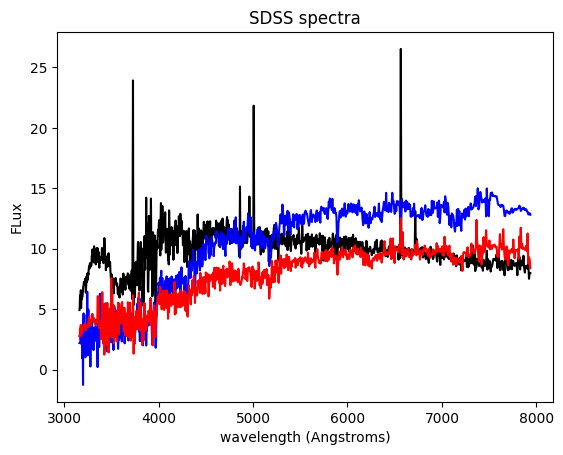

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-', label='Spectrum 0')
plt.plot(wavelength, flux1, 'b-', label='Spectrum 1')
plt.plot(wavelength, flux2, 'r-', label='Spectrum 2')
plt.xlabel("wavelength (Angstroms)")
plt.ylabel("FLux")
plt.title("SDSS spectra")

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


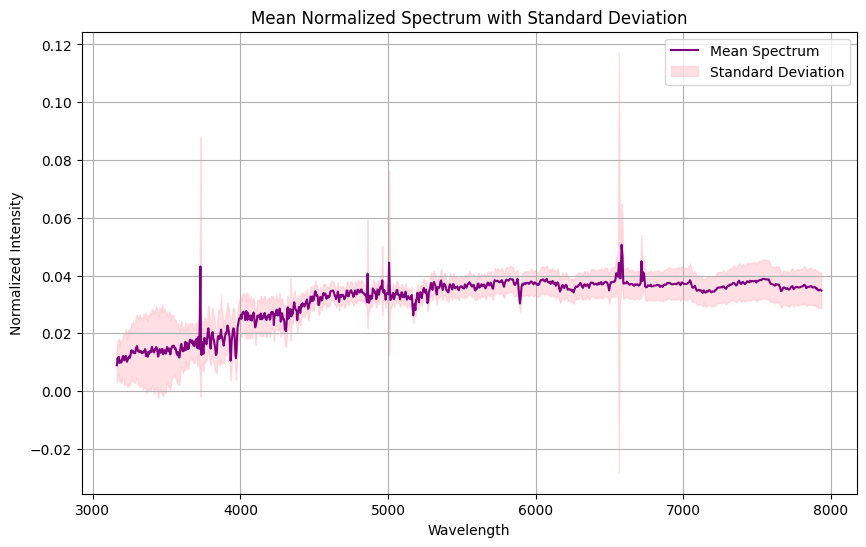

Wavelength with highest variation: 6564.48 Angstroms


In [ ]:
from sklearn.preprocessing import normalize

spectra = data['spec_recons']

normalized_spectra = normalize(spectra, axis=1) #Use the function normalize to scale the spectra

mean_spectrum = np.mean(normalized_spectra, axis=0) #Compute the mean and standard deviation of the normalized spectra
sd_spectrum = np.std(normalized_spectra, axis=0)

wavelengths = data['wavelength'] #We plot the mean spectrum along with the standard deviation


#Plot the mean normalized spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, mean_spectrum, label='Mean Spectrum', color='purple')
plt.fill_between(wavelengths, mean_spectrum - sd_spectrum, mean_spectrum + sd_spectrum, color='pink', alpha=0.5, label='Standard Deviation')
plt.title('Mean Normalized Spectrum with Standard Deviation')
plt.xlabel('Wavelength')
plt.ylabel('Normalized Intensity')
plt.legend()
plt.grid(True)
plt.show()

#Get the wavelength with highest variation
max_var_wavelength = wavelength[np.argmax(sd_spectrum)]
print("Wavelength with highest variation: {:.2f} Angstroms".format(max_var_wavelength))


**The mean spectrum is the average normalized intensity observed across the samples for each wavelength**

**Some factors that might cause this variation are noise, environmental conditions, etc.**

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_projected = pca.fit_transform(normalized_spectra)

2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

4000


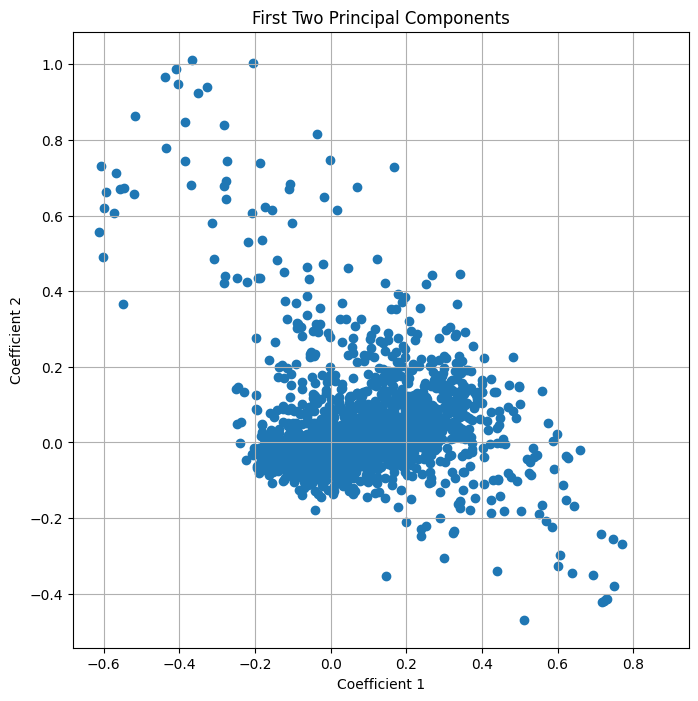

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x_projected[:, 0], x_projected[:, 1])
plt.xlabel('Coefficient 1')
plt.ylabel('Coefficient 2')
plt.axis('square')
print(len(x_projected))
plt.title('First Two Principal Components')

#We want to set x and y axis limits to be equal
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

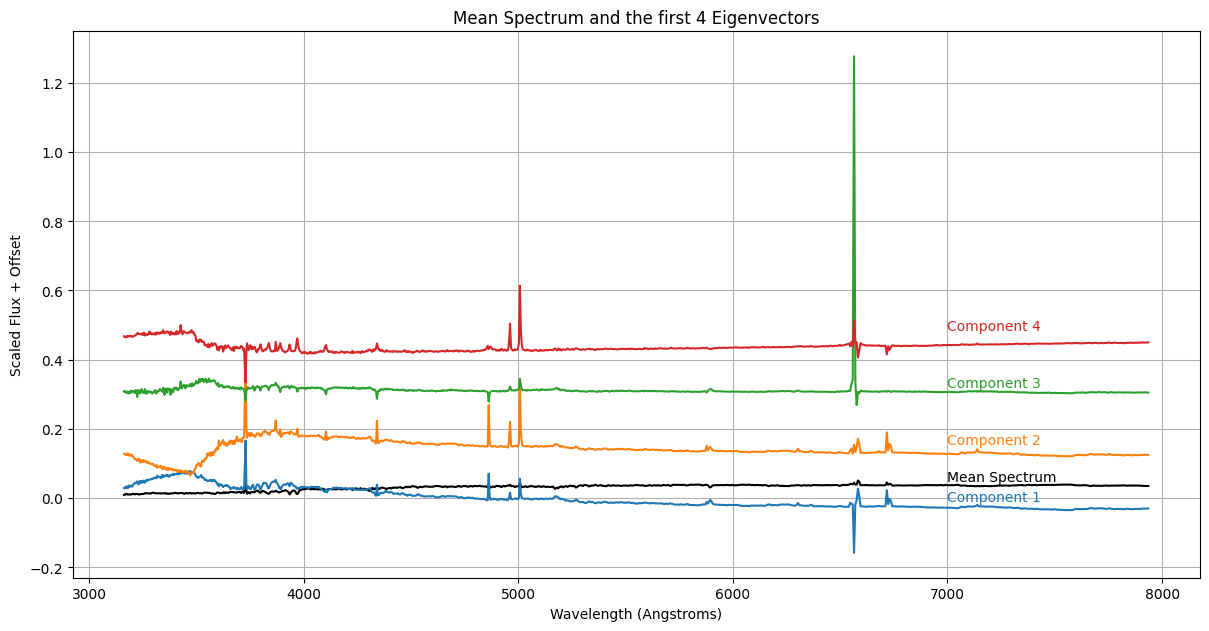

In [ ]:
#plot the mean spectrum
plt.figure(figsize=(12,6))
plt.plot(wavelengths, mean_spectrum, label="Mean Spectrum", color='black')
plt.text(7000, 0.15 - 0.10, "Mean Spectrum", color='black')

#plot the first four eigenvectors
for i in range(4):
    eigenvector = pca.components_[i]

    #add an arbitrary y-offset between the spectra for clarity
    y_off = i*0.5
    lines = plt.plot(wavelength, pca.components_[i] + 0.155 * i, label = ("component" + str(1+i)))
    c = lines[0].get_color()

    plt.text(7000, -0.01 + 0.165 * i, "Component %i" % (i + 1), color=c)
plt.tight_layout()
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Scaled Flux + Offset')
plt.title('Mean Spectrum and the first 4 Eigenvectors')
plt.legend
plt.grid()
plt.show()

Here, we plot the mean spectrum to serve as the baseline.

The eigenvectors display distinct patterns of variation as compared to the mean spectrum

We added an arbitrary y-offset to help visually distinguish between them

The contribution of each eigenvector to the overall variability is showed by the distance between them and the mean spectrum

large peaks or dips show wavelength with corresponding pattern of variation that is notable across the dataset.